# BMI565 - Bioinformatics Programming & Scripting

## Interactive Data Visualizations with Ipython Widgets

#### Table of Contents

1. [Introduction](#Preamble)
    * Dependencies
    * Installation
    * Setup
2. [Ipython Widgets](#Ipython-Widgets)
    * Example: The Button Widget
    * Example: The ToggleButtons Widget
    * A Simplification
    * Widgets in Context
3. [Motivational Example: Malignant or Benign?](#Motivational-Example:-Malignant-or-Benign?)
    * Load Data into Pandas
    * Initializing & Re-Rendering Visualizations
    * Bringing It All Together
4. [In-Class Exercises](#In---Class-Exercises)
5. [Reference](#Reference)

### Introduction

#### Dependencies

The following dependencies are required to run this notebook.

1. Python
    * Python 3.x.x
2. Python Libraries
    * Pandas 0.20.3
    * Jupyter 1.0.0
    * Jupyter Dashboards 0.7.0
    * Jupyter Dashboards Bundler 0.9.1
    * Ipywidgets 6.0.0
3. JavaScript
    * Node.js 5.x +
    * NPM 3.5.x +
    
#### Installation
Paste & run the following commands into your terminal. 

```bash
pip3 install pandas==0.20.3  # Pandas (Introduces DataFrame data structure, similar to R)
pip3 install jupyter==1.0.0  # Jupyter Notebook
pip3 install jupyter_dashboards==0.7.0  # Jupyter Dashboards
jupyter dashboards quick-setup --sys-prefix  # Jupyter Dashboards - Extension Setup Step
pip3 install jupyter_dashboards_bundlers==0.9.1  # Jupyter Dashboard Bundler
jupyter bundlerextension enable --sys-prefix --py dashboards_bundlers  # Jupyter Bundler - Extension Setup Step
pip3 install ipywidgets==6.0.0 # Ipywidgets
jupyter nbextension enable --py --sys-prefix widgetsnbextension  # Ipywidgets - Extension Setup Step
```
#### Setup

In [1]:
# Render Plots Inline
%matplotlib notebook

# Imports: Standard Library
import re as Rgx
import math as Math

# Imports: Third Party
import pandas as Pandas
import matplotlib.pyplot as Plot
from ipywidgets import *
from IPython.display import display
from IPython.display import clear_output

### Ipython Widgets

Ipython widgets provide a way to introduce interactivity into notebooks. The widgets are implemented with HTML (structure), CSS (styling), and JavaScript (action) and encapsulate specific UI functionalities.

In [2]:
sorted(widgets.Widget.widget_types)

['Jupyter.Accordion',
 'Jupyter.BoundedFloatText',
 'Jupyter.BoundedIntText',
 'Jupyter.Box',
 'Jupyter.Button',
 'Jupyter.ButtonStyle',
 'Jupyter.Checkbox',
 'Jupyter.ColorPicker',
 'Jupyter.Controller',
 'Jupyter.ControllerAxis',
 'Jupyter.ControllerButton',
 'Jupyter.DatePicker',
 'Jupyter.Dropdown',
 'Jupyter.FloatProgress',
 'Jupyter.FloatRangeSlider',
 'Jupyter.FloatSlider',
 'Jupyter.FloatText',
 'Jupyter.HBox',
 'Jupyter.HTML',
 'Jupyter.HTMLMath',
 'Jupyter.Image',
 'Jupyter.IntProgress',
 'Jupyter.IntRangeSlider',
 'Jupyter.IntSlider',
 'Jupyter.IntText',
 'Jupyter.Label',
 'Jupyter.Play',
 'Jupyter.ProgressStyle',
 'Jupyter.RadioButtons',
 'Jupyter.Select',
 'Jupyter.SelectMultiple',
 'Jupyter.SelectionSlider',
 'Jupyter.SliderStyle',
 'Jupyter.Tab',
 'Jupyter.Text',
 'Jupyter.Textarea',
 'Jupyter.ToggleButton',
 'Jupyter.ToggleButtons',
 'Jupyter.VBox',
 'Jupyter.Valid',
 'jupyter.DirectionalLink',
 'jupyter.Link']

#### Example: The Button Widget

Each widget takes a set of initialization arguments ([see documentation for each widget here](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html)). The most basic of example is perhaps a simple button element:

In [3]:
button = widgets.Button(
    description = "I'm a Button! Click me!"
)
button

Widget Javascript not detected.  It may not be installed or enabled properly.


Looks great, but what does it do? Nothing. Let's fix that:

In [18]:
# Define a Function for The Button to Trigger
def makeAnimalSound (element):
    import random
    sounds = ["moo", "squawk", "cacaw", "woof", "oink", "rawr", "meow", "bark"]
    print(random.sample(sounds, 1), element)

button.on_click(makeAnimalSound)
button

#### Example: The ToggleButtons Widget

A more useful example for data visualization is the `ToggleButtons` widget, which can be used to interactively filter a data set. 

In [19]:
toggle = widgets.ToggleButtons(
    options = ["bpm", "bmi", "systolic", "diastolic"],
    description = 'Filter:',
    disabled = False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
)
toggle

Widget interactivity is powered by JavaScript's [event loop architecture](https://developer.mozilla.org/en-US/docs/Web/JavaScript/EventLoop). Certain widgets, like `Buttons` have specialized event methods, such as `on_click`, however, for slider and toggle widgets, we can use the `observe` method to bind an action to interactions with the widget.

In [20]:
def callback (event):
    if "value" in event["new"]:
        print(event["new"]["value"])
        
toggle.observe(callback)
toggle

Above, we defined a function called `callback`, which checks for an updated filter value and prints it if it exists. We then hand in this 'callback function' as a parameter to the `observe` method, binding interactions with the `ToggleButtons widget` to `callbacks` functionality. This architecture is not common in Python, but is the bread and butter of event-based programming in JavaScript (and many other asynchronous languages). To see more about events, see their [documentation](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Events.html).

#### A Simplification
Often times, we're only concerned with the specific value of the interaction. In those cases, we can simplify the above using the `interact` method, which allows us to work with the widget data directly (rather than extracting it from the `event` parameter, as we did with the `callback` method above). 

In [22]:
toggle = interact(lambda x: x, x = widgets.ToggleButtons(
    options = ["bpm", "bmi", "systolic", "diastolic"],
    description = 'Filter:',
    disabled = False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
))

Here, we pass to the `interact` method a simple `lambda` function, which returns the value passed to it, and bind this to our familiar `ToggleButtons` widget. 

#### Widgets in context

In addition to the boilerplate widgets described, the ipywidgets API also enables the development of [custom widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Custom.html). 

### Motivational Example: Malignant or Benign?

Widgets enable us to interactively visualize and explore data sets. To illustrate this, we'll use a dataset with 30 (continuous) breast cancer imaging features and a (categorical) dependent variable of `diagnosis` with two values (malignant or benign).

The original data along with descriptions of each feature can be found on the <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)" target="_blank">UCI Machine Learning Repository</a> website. 

#### Load Data into Pandas

In [8]:
# Read in Data & See Head
data = Pandas.read_csv("data/data.csv").drop(["id", "Unnamed: 32"], axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Initializing & Re-Rendering Visualizations

To generate interactive data visualizations with Matplotlib, we can look at the visualization component as having two basic pieces: 
* Initialization – Where we setup the basics of the plot and `show` it. 
* Updating – Where we update the data and any associated axes, legends, labels, etc. 

Below is an example of a very basic initialization method.

In [9]:
def initPlot (groups, dependent, independent):
    """
    Method to initialize a plot, returns fig & axis
    """
    # Structure Data for Matplotlib
    keys, structuredData = [], []
    for key, group in groups:
        keys.append(key)
        structuredData.append(group[independent])
    # Setup Plot Figure & Axis
    fig = Plot.figure()
    axis = fig.add_subplot(111)
    # Set Labels
    axis.set_xlabel(dependent)
    axis.set_ylabel(independent) 
    # Set X Axis Ticks
    axis.set_xticks([1, 2])
    axis.set_xticklabels(keys)
    # Generate Violin Plot
    axis.violinplot(structuredData)
    Plot.ion()
    Plot.show()
    return fig, axis

And the update function, notice the importand call to `Plot.cla()`, which clears the `axis` object and avoids plots rendering on top of eachother. 

In [14]:
def updatePlot (groups, dependent, independent, fig, axis):
    """
    Void Method to Render a Plot with a Pandas DataFrame
    """
    # Important – Clear Plot Axis
    Plot.cla()
    # Structure Data for Matplotlib
    keys, structuredData = [], []
    for key, group in groups:
        keys.append(key)
        structuredData.append(group[independent])
    # Set Labels
    axis.set_xlabel(dependent)
    axis.set_ylabel(independent) 
    # Set X Axis Ticks
    axis.set_xticks([1, 2])
    axis.set_xticklabels(keys)
    # Set Title
    Plot.title("Distribution of %s by %s" % (independent, dependent))
    # Generate Violin Plot
    axis.violinplot(structuredData, showmeans = True)

#### Bringing It All Together

<IPython.core.display.Javascript object>


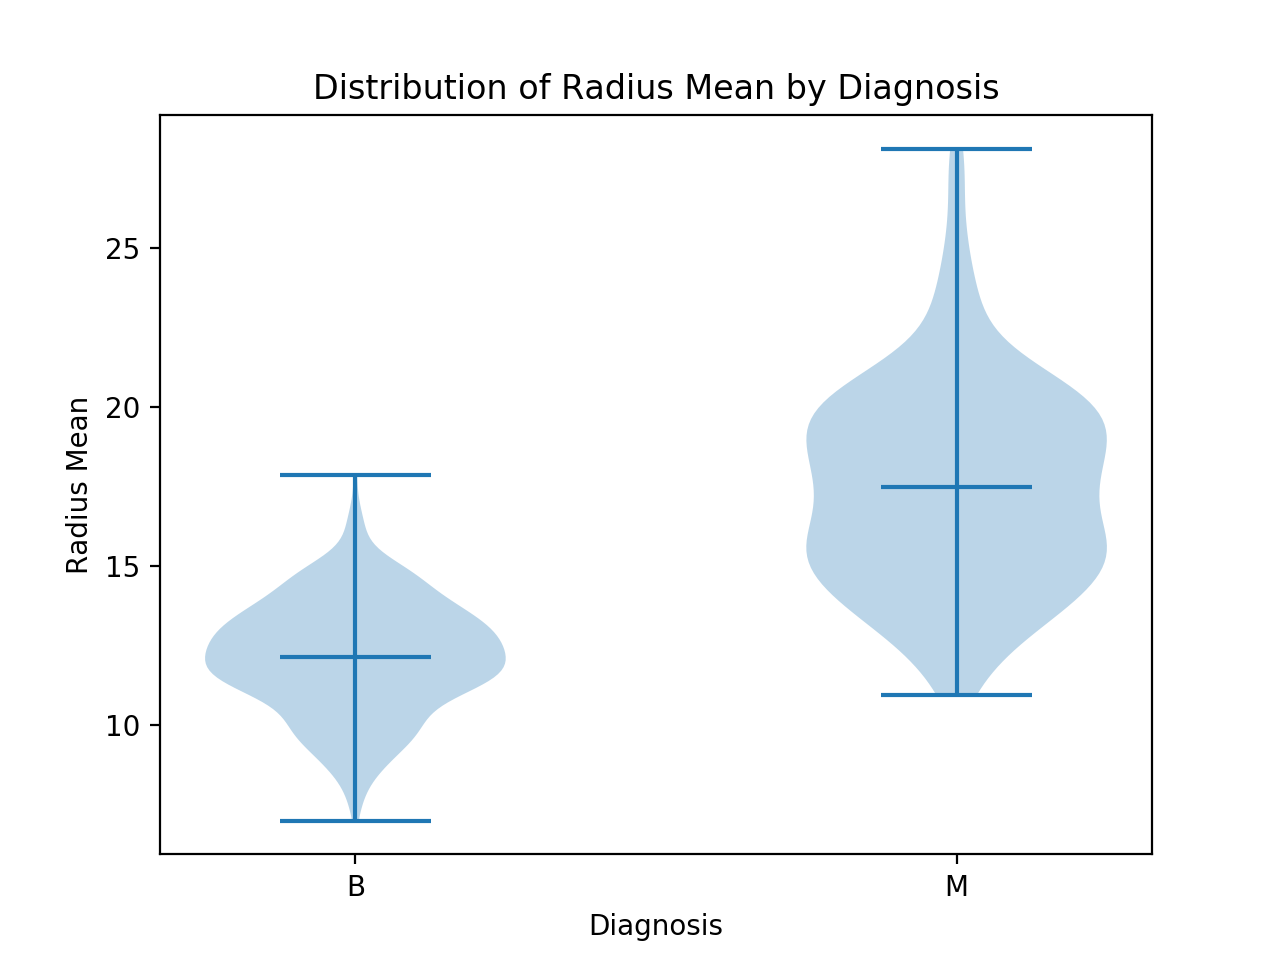

<function __main__.<lambda>>

In [15]:
# Prettify Column Names - Replace Underscores with Spaces and Capitalize the First Letter of Each Word
data.columns = [" ".join([word[0].upper() + word[1:] for word in col.split("_")]) for col in data.columns]

# Filter Columns
filterCols = list(data.columns.drop('Diagnosis'))[0:5]

# Group Data by Diagnosis
groups = data.groupby("Diagnosis")
    
# Initialize Plot
fig, axis = initPlot(groups, "Diagnosis", filterCols[0])

# Create Filter Toggle
filters = widgets.ToggleButtons(
    options = filterCols,
    description = 'Filter:',
    disabled = False,
    button_style='info',
    tooltip='Feature',
    icon='check'
)

# Bing ToggleButtons Widget Events to Rendering Function
interact(lambda x: updatePlot(groups, "Diagnosis", x, fig, axis), x = filters)

### In-Class Excercises

### Further Reading & Reference - This Sections Not as Relevant Right Now

* [Data-Ink Ratio](https://en.wikipedia.org/wiki/Edward_Tufte#Information_design) <sup>1</sup>
* [Exploratory Versus Explanatory](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis) <sup>2</sup>
* [Dimensionality Reduction Techniques](https://en.wikipedia.org/wiki/Dimensionality_reduction)
    * [Principle Component Analysis (PCA)](http://setosa.io/ev/principal-component-analysis/) <sup>3</sup>
    * [t-distributed Stochastic Neighbor Embedding (t-SNE)](https://distill.pub/2016/misread-tsne/) <sup>4</sup>
        * [SK Learning t-SNE Implementation](http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py)


1. Tufte, Edward R (1983), The Visual Display of Quantitative Information (2nd ed.), Cheshire, CT: Graphics Press, ISBN 0-9613921-4-2.
2. [Knaflic, Cole N. (2014), Exloratory vs Explanatory Analysis. Blog post.](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)
3. [Hotelling, Harold (1933). Analysis of a complex of statistical variables into principal components. Journal of Educational Psychology. American Psychological Association. 24 (6): 417–441.](http://content.apa.org/doiLanding?doi=10.1037%2Fh0071325)
4. [van der Maaten, L. & Hinton, G. (2008). Visualizing data using t-SNE. The Journal of Machine Learning Research. 9 (2579-2605), 85.](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)